In [2]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

Dataset Shape: (4812, 11)

Column Data Types:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
duration         int64
description     object
genre           object
dtype: object

Missing Values:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64

First 5 Rows:
  show_id  ...             genre
0      s2  ...            Dramas
1      s3  ...     Horror Movies
2      s4  ...            Action
3      s5  ...            Dramas
4      s6  ...  International TV

[5 rows x 11 columns]


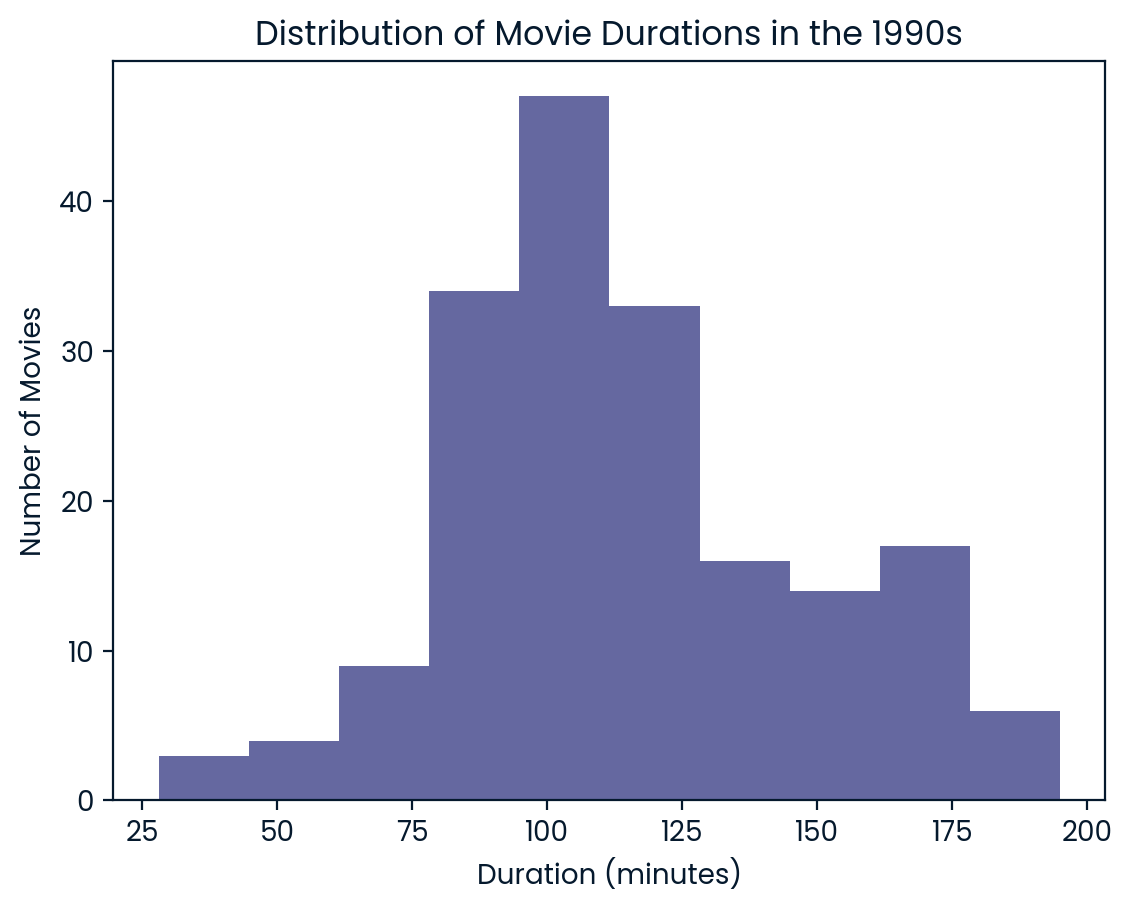

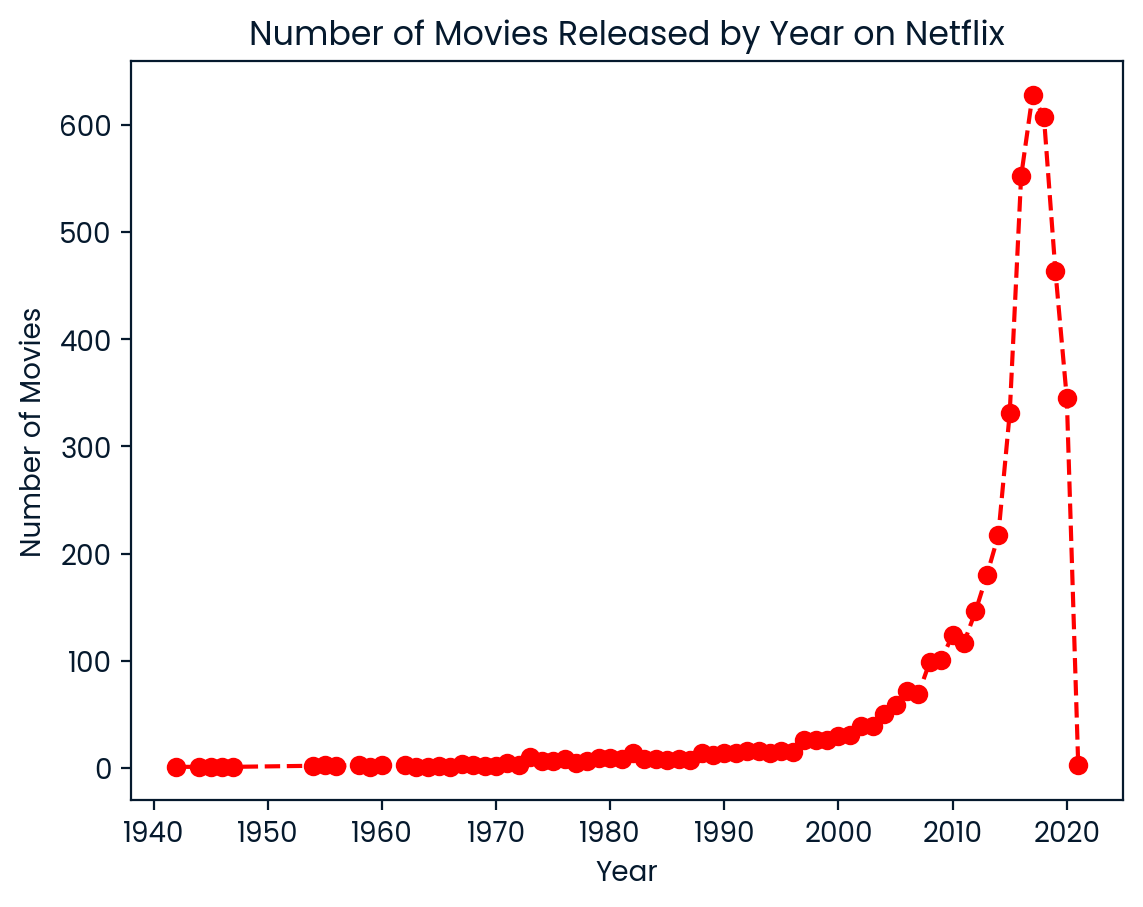

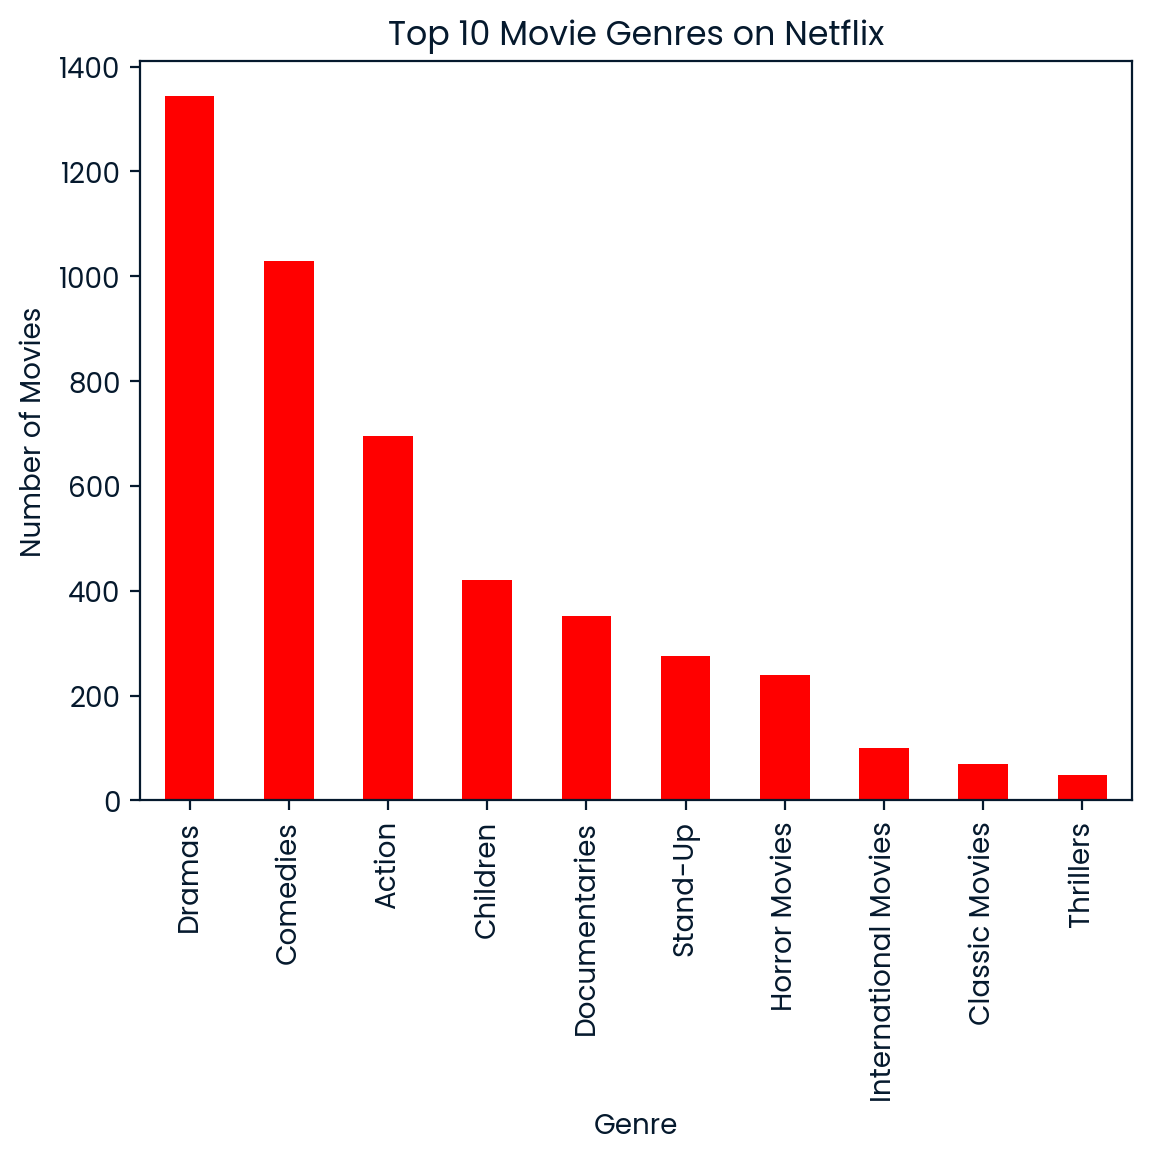

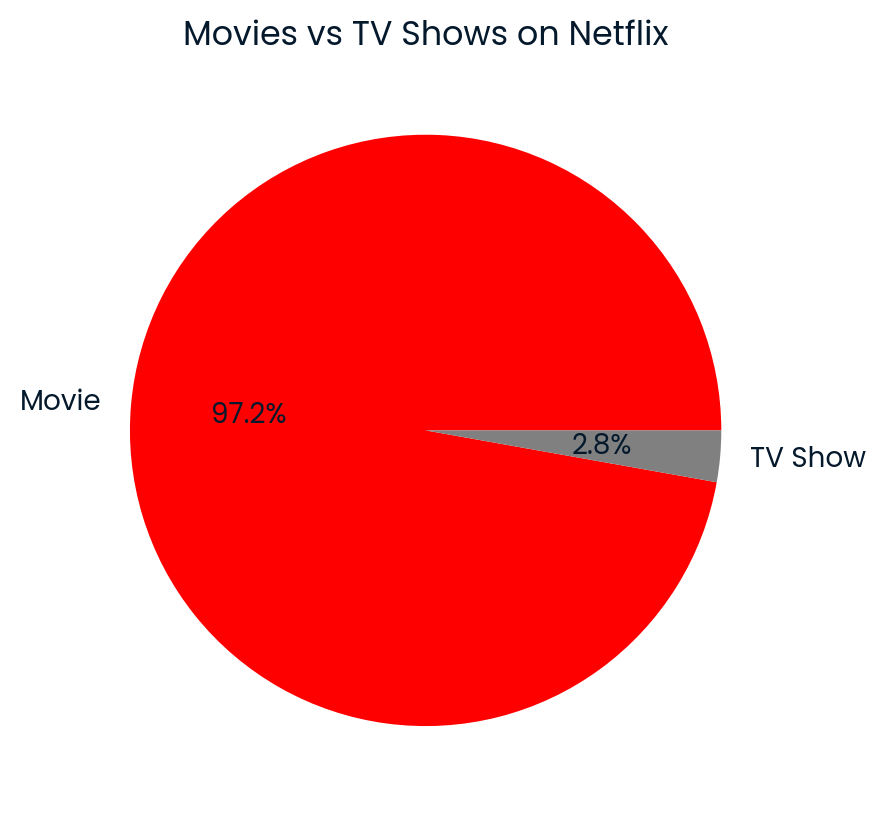

Found: EVANGELION: DEATH (TRUE)² - Duration: 69 min
Found: Hero - Duration: 89 min
Found: Look Out, Officer - Duration: 88 min
Found: Passenger 57 - Duration: 84 min
Found: Rumble in the Bronx - Duration: 89 min
Found: The Bare-Footed Kid - Duration: 83 min
Found: The End of Evangelion - Duration: 87 min
Total short action movies (<90 min): 7


In [10]:
# Data overview
print("Dataset Shape:", netflix_df.shape)
print("\nColumn Data Types:")
print(netflix_df.dtypes)
print("\nMissing Values:")
print(netflix_df.isnull().sum())
print("\nFirst 5 Rows:")
print(netflix_df.head())


netflix_subset = netflix_df[netflix_df["type"] == "Movie"]
movies_1990s = netflix_subset[(netflix_subset["release_year"] >= 1990) & (netflix_subset["release_year"] < 2000)]
plt.hist(movies_1990s["duration"])
plt.title('Distribution of Movie Durations in the 1990s')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

movies_per_year = netflix_subset.groupby("release_year").size()
movies_per_year.plot(marker = "o", color = "r", linestyle = "--")
plt.title("Number of Movies Released by Year on Netflix")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()

top_genres = netflix_subset["genre"].value_counts().head(10)
top_genres.plot(kind="bar", color="r")
plt.title("Top 10 Movie Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=90)
plt.show()

type_counts = netflix_df["type"].value_counts()
type_counts.plot(kind="pie", colors=["red", "gray"], autopct="%1.1f%%")
plt.title("Movies vs TV Shows on Netflix")
plt.ylabel("")
plt.show()

duration = 100
action_1990s = movies_1990s[movies_1990s["genre"] == "Action"]

short_movie_count = 0 
for label, row in action_1990s.iterrows() :
    if row["duration"] < 90:
        short_movie_count = short_movie_count + 1
        print("Found:", row["title"], "- Duration:", row["duration"], "min")

print("Total short action movies (<90 min):", short_movie_count)




